In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/ibm-assignment

/content/drive/MyDrive/ibm-assignment


In [ ]:
ls

dataset/  Flowers-Dataset.zip


In [ ]:
!unzip  Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [ ]:
# Image augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator( rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/ibm-assignment/dataset/Training',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 2600 images belonging to 1 classes.


In [9]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/ibm-assignment/dataset/Testing',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1717 images belonging to 2 classes.


In [10]:
x_train.class_indices

{'sunflower': 0, 'tulip': 1}

In [ ]:
# Create model

In [11]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

In [12]:
visible = Input(shape=(10,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

In [ ]:
# Adding layers

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [15]:
model = Sequential()

In [16]:

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

In [17]:
model.add(MaxPooling2D((2, 2)))

In [18]:
 model.add(Flatten())

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))

In [ ]:
model.add(Dense(4, activation='softmax'))

In [21]:
# Compile model

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
len(x_train)

72

In [24]:
1732/24

72.16666666666667

In [ ]:
# Save the model

In [29]:
model.save(' flowers.h5')

In [26]:
ls

 drive/  ' flowers.h5'   sample_data/


In [ ]:
# Testing

In [27]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
from tensorflow import keras
model = keras.models.load_model('/content/ flowers.h5')

In [51]:
img=image.load_img(r'/content/drive/MyDrive/ibm-assignment/dataset/Testing/sunflower/1008566138_6927679c8a.jpg')

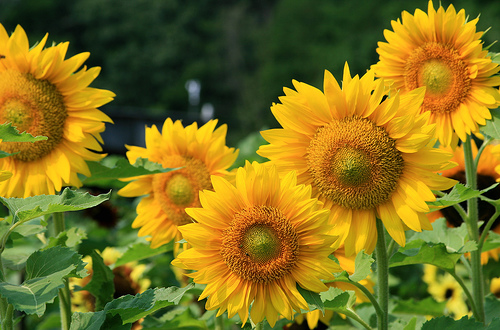

In [52]:
img